# Virat Kohli - ODI Analysis

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from preprocessing import map_columns
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor , XGBRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

### Importing Clean Data

In [2]:
# df = pd.read_excel('ViratKohli-ODI.xlsx')
df = pd.read_csv('./Data/Data-Regression.csv')

In [3]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude,SENA
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0


### Data Description and Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match             308 non-null    int64  
 1   Innings           296 non-null    float64
 2   Date              308 non-null    object 
 3   M/Inns            308 non-null    object 
 4   Posn              308 non-null    int64  
 5   Versus            308 non-null    object 
 6   Ground            308 non-null    object 
 7   How Dismissed     308 non-null    object 
 8   Runs              308 non-null    int64  
 9   B/F               308 non-null    int64  
 10  S/R               308 non-null    float64
 11  Progressive-Runs  308 non-null    int64  
 12  Progressive-B/F   308 non-null    int64  
 13  Progressive-Avg   308 non-null    float64
 14  Progressive-S/R   308 non-null    float64
 15  Captain           308 non-null    object 
 16  Dismissal Type    308 non-null    object 
 1

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Match,308.0,154.500000,89.056162,1.0000,77.7500,154.5000,231.2500,308.0000
Innings,296.0,148.500000,85.592056,1.0000,74.7500,148.5000,222.2500,296.0000
Posn,308.0,3.061688,0.909286,0.0000,3.0000,3.0000,3.0000,7.0000
Runs,308.0,47.262987,43.310924,0.0000,8.7500,34.0000,80.2500,183.0000
B/F,308.0,50.464286,39.894919,0.0000,13.0000,43.0000,83.0000,159.0000
S/R,308.0,77.269286,39.081306,0.0000,59.9050,80.9500,100.0000,209.0900
Progressive-Runs,308.0,6910.480519,4375.897862,12.0000,2997.2500,6473.0000,11105.0000,14557.0000
Progressive-B/F,308.0,7578.116883,4596.356583,22.0000,3581.7500,7195.0000,11923.5000,15543.0000
Progressive-Avg,308.0,52.078214,6.768001,12.0000,49.1650,52.1700,57.8175,60.3100
Progressive-S/R,308.0,87.948377,6.428469,54.5500,83.9075,89.9100,92.9300,93.8500


### Null Values

In [6]:
df.isnull().sum()

Match                0
Innings             12
Date                 0
M/Inns               0
Posn                 0
Versus               0
Ground               0
How Dismissed        0
Runs                 0
B/F                  0
S/R                  0
Progressive-Runs     0
Progressive-B/F      0
Progressive-Avg      0
Progressive-S/R      0
Captain              0
Dismissal Type       0
City                 0
State/Province      13
Country              0
ICC Region           0
Latitude             0
longitude            0
SENA                 0
dtype: int64

### Machine Learning

In [7]:
ml = df.copy()

In [8]:
ml.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude,SENA
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught,Dambulla,Central Province,Sri Lanka,Asia,7.8600,80.6736,0
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW,Colombo,Western Province,Sri Lanka,Asia,6.9322,79.8726,0


In [9]:
ml = ml[['Date','M/Inns','Versus','Country','SENA','Captain','B/F','Runs']]

In [10]:
ml.head()

,Date,M/Inns,Versus,Country,SENA,Captain,B/F,Runs
0,2008-08-18,1st,Sri Lanka,Sri Lanka,0,No,22,12
1,2008-08-20,2nd,Sri Lanka,Sri Lanka,0,No,67,37
2,2008-08-24,1st,Sri Lanka,Sri Lanka,0,No,38,25
3,2008-08-27,1st,Sri Lanka,Sri Lanka,0,No,66,54
4,2008-08-29,2nd,Sri Lanka,Sri Lanka,0,No,46,31


### Preprocessing

### Using FunctionTransformer to transform the columns according to our logic

In [11]:
# def map_columns(ml):
#     df = ml.copy()
    
#     df['Date'] = pd.to_datetime(df['Date'])
#     df['Month'] = df['Date'].dt.month
#     df['Year'] = df['Date'].dt.year
#     df.drop('Date',inplace=True,axis=1)
    
#     df['M/Inns'] = df['M/Inns'].map({
#         '1st': 1,
#         '2nd': 2,
#         'N/A - No Result': 0
#     })
    
#     df['Captain'] = df['Captain'].map({
#         'Yes': 1,
#         'No': 0
#     })
    
#     return df

In [12]:
mapping_transformer = FunctionTransformer(func=map_columns,validate=False)

In [13]:
categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)

In [14]:
preprocessor = ColumnTransformer(transformers=[('cat_enc', categorical_encoder, ['Versus', 'Country'])], remainder='passthrough')  # keep other columns)

In [15]:
lr = LinearRegression()
kn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()
cb = CatBoostRegressor()
lgb = LGBMRegressor()

In [16]:
x = ml.drop('Runs',axis=1)
y = ml[['Runs']]

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.05,shuffle=False)

### Linear Regression

In [18]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

pipeline.fit(xtrain,ytrain)
lr_preds = pipeline.predict(xtest)
lr_r2 = r2_score(ytest,lr_preds)
lr_mae = mean_absolute_error(ytest,lr_preds)
lr_mse = mean_squared_error(ytest,lr_preds)
lr_rmse = np.sqrt(lr_mse)

print('r2 Score: ',lr_r2)
print('MAE: ',lr_mae)
print('RMSE: ',lr_rmse)

r2 Score:  0.9454338678798008
MAE:  7.721948022611436
RMSE:  9.854549979595328


### KNN

In [ ]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', KNeighborsRegressor())
])

pipeline.fit(xtrain,ytrain)
kn_preds = pipeline.predict(xtest)
kn_r2 = r2_score(ytest,kn_preds)
kn_mae = mean_absolute_error(ytest,kn_preds)
kn_mse = mean_squared_error(ytest,kn_preds)
kn_rmse = np.sqrt(kn_mse)

print('r2 Score: ',kn_r2)
print('MAE: ',kn_mae)
print('RMSE: ',kn_rmse)

### Decision Tree

In [ ]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', DecisionTreeRegressor())
])

pipeline.fit(xtrain,ytrain)
dt_preds = pipeline.predict(xtest)
dt_r2 = r2_score(ytest,dt_preds)
dt_mae = mean_absolute_error(ytest,dt_preds)
dt_mse = mean_squared_error(ytest,dt_preds)
dt_rmse = np.sqrt(dt_mse)

print('r2 Score: ',dt_r2)
print('MAE: ',dt_mae)
print('RMSE: ',dt_rmse)

### Random Forest

In [ ]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor())
])

pipeline.fit(xtrain,ytrain)
rf_preds = pipeline.predict(xtest)
rf_r2 = r2_score(ytest,rf_preds)
rf_mae = mean_absolute_error(ytest,rf_preds)
rf_mse = mean_squared_error(ytest,rf_preds)
rf_rmse = np.sqrt(rf_mse)

print('r2 Score: ',rf_r2)
print('MAE: ',rf_mae)
print('RMSE: ',rf_rmse)

### Adaboost

In [ ]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', AdaBoostRegressor())
])

pipeline.fit(xtrain,ytrain)
ada_preds = pipeline.predict(xtest)
ada_r2 = r2_score(ytest,ada_preds)
ada_mae = mean_absolute_error(ytest,ada_preds)
ada_mse = mean_squared_error(ytest,ada_preds)
ada_rmse = np.sqrt(ada_mse)

print('r2 Score: ',ada_r2)
print('MAE: ',ada_mae)
print('RMSE: ',ada_rmse)

### Gradient Boosting

In [ ]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor())
])

pipeline.fit(xtrain,ytrain)
gb_preds = pipeline.predict(xtest)
gb_r2 = r2_score(ytest,gb_preds)
gb_mae = mean_absolute_error(ytest,gb_preds)
gb_mse = mean_squared_error(ytest,gb_preds)
gb_rmse = np.sqrt(gb_mse)

print('r2 Score: ',gb_r2)
print('MAE: ',gb_mae)
print('RMSE: ',gb_rmse)

###  LGBM

In [ ]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', LGBMRegressor())
])

pipeline.fit(xtrain,ytrain)
lgb_preds = pipeline.predict(xtest)
lgb_r2 = r2_score(ytest,lgb_preds)
lgb_mae = mean_absolute_error(ytest,lgb_preds)
lgb_mse = mean_squared_error(ytest,lgb_preds)
lgb_rmse = np.sqrt(lgb_mse)

print('r2 Score: ',lgb_r2)
print('MAE: ',lgb_mae)
print('RMSE: ',lgb_rmse)

### Catboost

In [ ]:
pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', CatBoostRegressor())
])

pipeline.fit(xtrain,ytrain)
cb_preds = pipeline.predict(xtest)
cb_r2 = r2_score(ytest,cb_preds)
cb_mae = mean_absolute_error(ytest,cb_preds)
cb_mse = mean_squared_error(ytest,cb_preds)
cb_rmse = np.sqrt(cb_mse)

print('r2 Score: ',cb_r2)
print('MAE: ',cb_mae)
print('RMSE: ',cb_rmse)

### Predictions

In [ ]:
lrpreds = []
for i in lr_preds:
    lrpreds.append(np.absolute(int(i[0])))

In [ ]:
ytest['Preds'] = lrpreds

In [ ]:
ytest['Preds'] = ytest['Preds'].astype('int64')

In [ ]:
ytest['Difference'] = ytest['Preds'] - ytest['Runs']

### Post Processing

In [ ]:
xtest['Actual Score'] = ytest['Runs']
xtest['Predicted Score'] = ytest['Preds']
xtest['Prediction Error'] = ytest['Difference']

In [ ]:
xtest['Match Info'] = "Against " + xtest['Versus'] + " at " + xtest['Country'] 

In [ ]:
xtest = xtest[['Match Info','Date','B/F','Actual Score','Predicted Score','Prediction Error']]

### Results

In [ ]:
xtest

In [ ]:
# Matplotlib

print('\n\n')
plt.figure(figsize=(10,6))
plt.plot(xtest.index.to_numpy(), xtest['Actual Score'].to_numpy(), color = 'blue',marker = '.', label = 'Actual Score')
plt.plot(xtest.index.to_numpy(), xtest['Predicted Score'].to_numpy() , color = 'green', marker = '.' ,linestyle = '--', label = 'Predicted Score')
plt.legend()
plt.title('Actual Scores vs Predicted Scores - Model Performance')
plt.xlabel('Match Number')
plt.ylabel('Scores')
plt.grid()
plt.show()

In [ ]:


# ## Plotly
# import plotly.graph_objects as go

# fig = go.Figure()

# fig.add_trace(
#     go.Scatter(
#         x=xtest.index,
#         y=xtest['Actual Score'],
#         mode='lines+markers',
#         name='Actual Score',
#         marker=dict(symbol='circle'),
#         line=dict(width=2)
#     )
# )

# fig.add_trace(
#     go.Scatter(
#         x=xtest.index,
#         y=xtest['Predicted Score'],
#         mode='lines+markers',
#         name='Predicted Score',
#         marker=dict(symbol='circle'),
#         line=dict(width=2)
#     )
# )

# fig.update_layout(
#     title='Actual Scores vs Predicted Scores - Model Performance',
#     xaxis_title='Match Number',
#     yaxis_title='Scores',
#     width=1000,
#     height=600,
#     template='plotly_white',
#     legend=dict(x=0.01, y=0.99)
# )

# fig.show()


In [19]:
print('r2 Score: ',round(lr_r2,2))
print('MAE: ',round(lr_mae,2))
print('RMSE: ',round(lr_rmse,2))

r2 Score:  0.95
MAE:  7.72
RMSE:  9.85


### Let's now train our model on the entire data and save it

In [20]:
final_pipeline = Pipeline(steps=[
    ('mapping', mapping_transformer),
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

final_pipeline.fit(x,y)

Pipeline(steps=[('mapping',
                 FunctionTransformer(func=<function map_columns at 0x0000016975031820>)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_enc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Versus', 'Country'])])),
                ('model', LinearRegression())])

In [21]:
import joblib
joblib.dump(final_pipeline, "kohli_odi_pipeline.pkl")

['kohli_odi_pipeline.pkl']

### Model saved as pkl file

In [22]:
testdata = pd.read_csv('./Data/NZL_ODI_testdata.csv')

In [23]:
testdata

,Date,M/Inns,Versus,Country,SENA,Captain,B/F
0,01-11-2025,1st,New Zealand,India,0,No,22
1,01-14-2025,1st,New Zealand,India,0,No,114
2,01-18-2025,2nd,New Zealand,India,0,No,77


In [24]:
prod_pipeline = joblib.load("kohli_odi_pipeline.pkl")

In [25]:
final_predictions = np.absolute(prod_pipeline.predict(testdata))

In [26]:
testdata['Predicted Score'] = final_predictions.astype('int64')

In [27]:
testdata.index = [308,309,310]

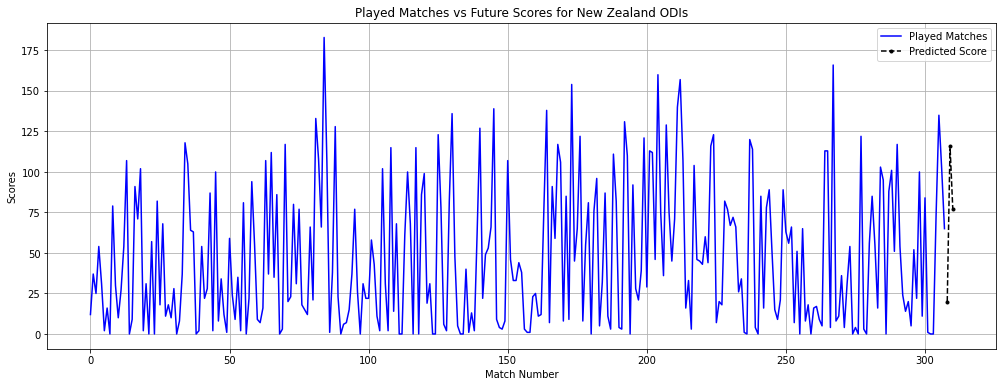

In [28]:

print('\n\n')
plt.figure(figsize=(17,6))
plt.plot(x.index.to_numpy() , y['Runs'].to_numpy(),label = 'Played Matches',color='blue')
plt.plot(testdata.index.to_numpy(), testdata['Predicted Score'].to_numpy() , color = 'k', marker = '.' ,linestyle = '--', label = 'Predicted Score')
plt.legend()
plt.title('Played Matches vs Future Scores for New Zealand ODIs')
plt.xlabel('Match Number')
plt.ylabel('Scores')
plt.grid()
plt.show() 